In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import regex
import numpy as np

import libraries 

In [2]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


load reader

In [52]:
IMAGE_PATH = r"C:\Users\khale\Desktop\fyp\test-STUFF\dataset-dates\training\19.jpg"
result = reader.readtext(IMAGE_PATH,decoder='wordbeamsearch',batch_size=50)
print(result)

[([[865, 393], [1422, 393], [1422, 543], [865, 543]], 'Cantitate neta;', 0.560899717913152), ([[1394, 243], [2076, 243], [2076, 592], [1394, 592]], '40ge', 0.48476922512054443), ([[333, 767], [607, 767], [607, 906], [333, 906]], 'Lolnc;', 0.4559762135438584), ([[1118, 790], [2024, 790], [2024, 1037], [1118, 1037]], 'L18345A', 0.9371044563412899), ([[410, 999], [861, 999], [861, 1120], [410, 1120]], 'Se consuina;', 0.4486320124393532), ([[348, 1126], [876, 1126], [876, 1299], [348, 1299]], 'de preferinia;', 0.474257431427978), ([[1108, 1103], [1911, 1103], [1911, 1337], [1108, 1337]], '12/2022', 0.9985896143185817), ([[346, 1289], [625, 1289], [625, 1430], [346, 1430]], 'Mainte', 0.4923908113383748), ([[358, 1440], [821, 1440], [821, 1598], [358, 1598]], 'de starsitul:', 0.49951950204484274)]


read text from images

In [53]:
result1=[]
result2=[]
result3=[]

In [54]:
for text in result:
    pattern = regex.find_date_true(text[1])
    if (pattern is not None):
        result1.append(pattern)
        print(pattern)

In [55]:
for text in result:
    pattern = regex.find_date_test_CMP1(text[1])
    if (pattern is not None):
        result2.append(pattern)
        print(pattern)

12/2022


In [56]:
for text in result:
    pattern = regex.find_date_Improved1(text[1])
    if (pattern is not None):
        result3.append(pattern)
        print(pattern)

12/2022


In [37]:
print(result1)
print(result2)
print(result3)

['12/10/2021', '0 1 0311']
['02166759', '12/10/2021', '0 1 0311']
['02166', '12/10/2021', '03113']


In [57]:
if  len(result1)==0:
    b_set = set(result2)
    c_set = set(result3)
    print(c_set.intersection(b_set))

{'12/2022'}


compare 2 result and return expiry

In [58]:
if  len(result1)>1:
    a_set = set(result1)
    b_set = set(result2)
    c_set = set(result3)
    print(c_set.intersection(a_set.intersection(b_set)))

compare the 3 result and extract the date

In [51]:
for text in result:
    pattern = regex.find_date_improved(text[1])
    if (pattern is not None):
        print(pattern)

30 06.2019
17 0618


print found pattern + accuracy

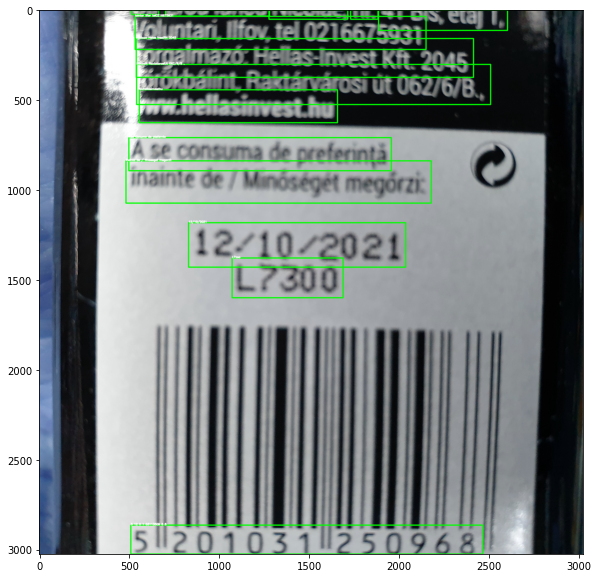

In [27]:
img = cv2.imread(IMAGE_PATH)
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
    img = cv2.putText(img, text, top_left, font, .5, (255, 255, 255), 2, cv2.LINE_AA)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()